## Decision Tree Regression

CART - Classification and Regression Tree

In [20]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step -1 REad the dataset

In [21]:
import pandas as pd
df = pd.read_csv("concrete_data.csv")
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


### Step - 2 Perform Basic Data Quality checks

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [23]:
df.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [24]:
df.duplicated().sum()

25

In [25]:
df=df.drop_duplicates(keep="first")
df.shape

(1005, 9)

In [26]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029],
           dtype='int64', length=1005)

In [27]:
df= df.reset_index(drop=True)
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1000,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1001,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1002,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1003,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [28]:
df.index

RangeIndex(start=0, stop=1005, step=1)

### Step - 3 : Seperate X and Y

In [29]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [31]:
x = df.drop(columns=["concrete_compressive_strength"])
y = df[["concrete_compressive_strength"]]

In [32]:
x.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [33]:
y.head()

,concrete_compressive_strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30


### Step 4 - Apply Preprocessing on X

In [34]:
x.dtypes

cement                float64
blast_furnace_slag    float64
fly_ash               float64
water                 float64
superplasticizer      float64
coarse_aggregate      float64
fine_aggregate        float64
age                     int64
dtype: object

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [37]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [38]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,2.506116,-0.836471,-0.865375,-0.941235,-0.597131,0.846302,-1.204081,-0.280312
1,2.506116,-0.836471,-0.865375,-0.941235,-0.597131,1.039748,-1.204081,-0.280312
2,0.516516,0.818045,-0.865375,2.153185,-1.019640,-0.546508,-2.225246,3.518569
3,0.516516,0.818045,-0.865375,2.153185,-1.019640,-0.546508,-2.225246,5.009865
4,-0.767375,0.700778,-0.865375,0.465320,-1.019640,0.051885,0.657677,4.931375


### Step 5 - Apply Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_pre,y,test_size=0.2,random_state=42)

In [40]:
xtrain.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
78,2.422696,-0.836471,-0.865375,-1.888315,3.746272,-1.576930,1.506987,-0.672758
29,1.882868,-0.836471,-0.865375,2.153185,-1.019640,-0.546508,-2.225246,-0.609967
280,-0.014683,-0.836471,0.652326,-1.006874,0.974606,-0.006149,1.281584,-0.672758
507,1.508919,-0.836471,-0.865375,1.684334,-1.019640,-1.753610,-0.659875,-0.280312
652,-1.072287,2.068510,-0.865375,1.004499,-1.019640,0.015775,-0.997357,-0.609967


In [41]:
ytrain.head()

,concrete_compressive_strength
78,41.30
29,38.60
280,23.14
507,23.85
652,15.75


In [42]:
xtrain.shape

(804, 8)

In [43]:
xtest.shape

(201, 8)

### Step 6 : Model building and tuning

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
dtr = DecisionTreeRegressor(
    max_depth=1,
    min_samples_leaf= 5,
    min_samples_split=5,
    criterion="squared_error"
)
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=1, min_samples_leaf=5, min_samples_split=5)

In [46]:
dtr.score(xtrain,ytrain)

0.25516987138413816

In [47]:
dtr.score(xtest,ytest)

0.26725432471090427

### Tuning the model to improve R2 Score

In [57]:
params = {
    "max_depth" : [2,3,4,5,6,7,8,9,10,11],
    "min_samples_split" : [4,5,6],
    "criterion" : ["squared_error","absolute_error"]
}

In [58]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeRegressor()
gscv = GridSearchCV(
    estimator = model,
    param_grid = params,
    cv = 5,
    scoring= "r2"
)
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_split': [4, 5, 6]},
             scoring='r2')

In [60]:
gscv.best_score_

0.8050068829485764

In [61]:
gscv.best_params_

{'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 4}

In [62]:
best_dtr = gscv.best_estimator_
best_dtr

DecisionTreeRegressor(max_depth=10, min_samples_split=4)

### Step 7 - Model evaluation

In [63]:
best_dtr.score(xtrain,ytrain)

0.9721904768741585

In [64]:
best_dtr.score(xtest,ytest)

0.8622324062202775

In [66]:
from sklearn.metrics import (mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score)

In [69]:
def evaluation_model(model,x,y) :
    ypred = model.predict(x)
    mse = mean_squared_error(y,ypred)
    mae = mean_absolute_error(y,ypred)
    mape = mean_absolute_percentage_error(y,ypred)
    r2 = r2_score(y,ypred)
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.4f}")
    print(f"R2 Score: {r2:.4f}")

In [70]:
print("Training Results :")
evaluation_model(best_dtr,xtrain,ytrain)

Training Results :
MSE: 7.13
MAE: 1.76
MAPE: 0.0563
R2 Score: 0.9722


In [71]:
print("Testing Results :")
evaluation_model(best_dtr,xtest,ytest)

Testing Results :
MSE: 41.10
MAE: 4.58
MAPE: 0.1621
R2 Score: 0.8622


In [72]:
ypred_test = best_dtr.predict(xtest)

In [73]:
ypred_test[0:5]

array([24.86461538, 21.47      , 18.975     , 48.97333333, 44.015     ])

In [74]:
ytest.head()

,concrete_compressive_strength
926,19.01
630,24.29
682,26.32
514,34.57
365,44.13


In [75]:
import seaborn as sns

<Axes: xlabel='concrete_compressive_strength', ylabel='Count'>

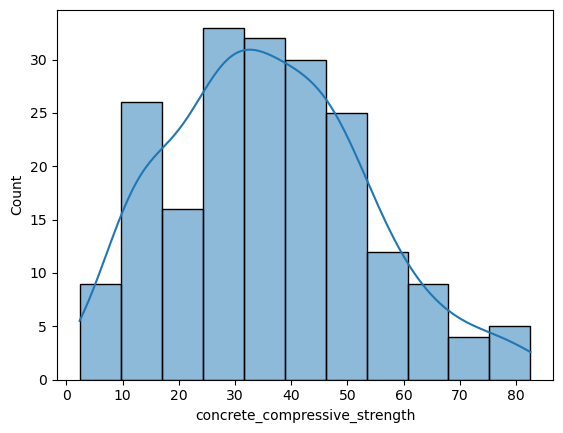

In [78]:
sns.histplot(data=ytest , x = "concrete_compressive_strength",kde = True)

<Axes: ylabel='Count'>

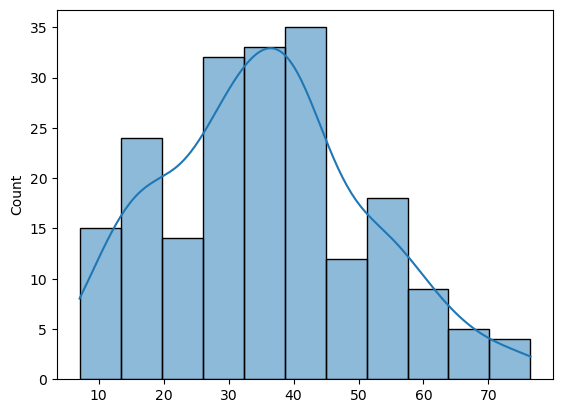

In [79]:
sns.histplot(data=ypred_test,kde=True)

### Check feature importances

In [80]:
imp = best_dtr.feature_importances_
imp = pd.Series(imp , index=xtrain.columns)
imp

cement                0.358291
blast_furnace_slag    0.094372
fly_ash               0.010859
water                 0.122336
superplasticizer      0.042514
coarse_aggregate      0.016874
fine_aggregate        0.027693
age                   0.327061
dtype: float64

In [81]:
imp.sort_values()

fly_ash               0.010859
coarse_aggregate      0.016874
fine_aggregate        0.027693
superplasticizer      0.042514
blast_furnace_slag    0.094372
water                 0.122336
age                   0.327061
cement                0.358291
dtype: float64

<Axes: >

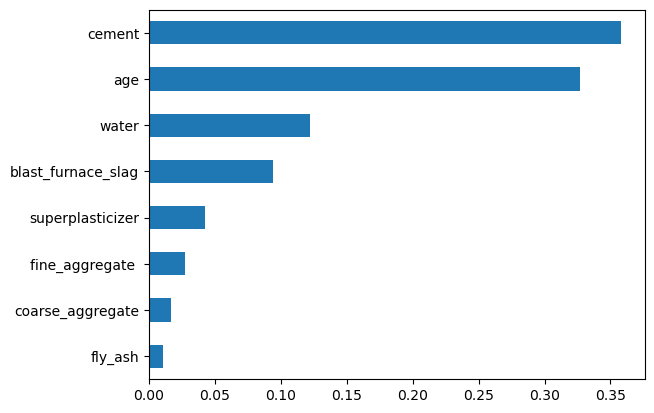

In [82]:
imp.sort_values().plot(kind="barh")

### Plotting the decision tree


In [83]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

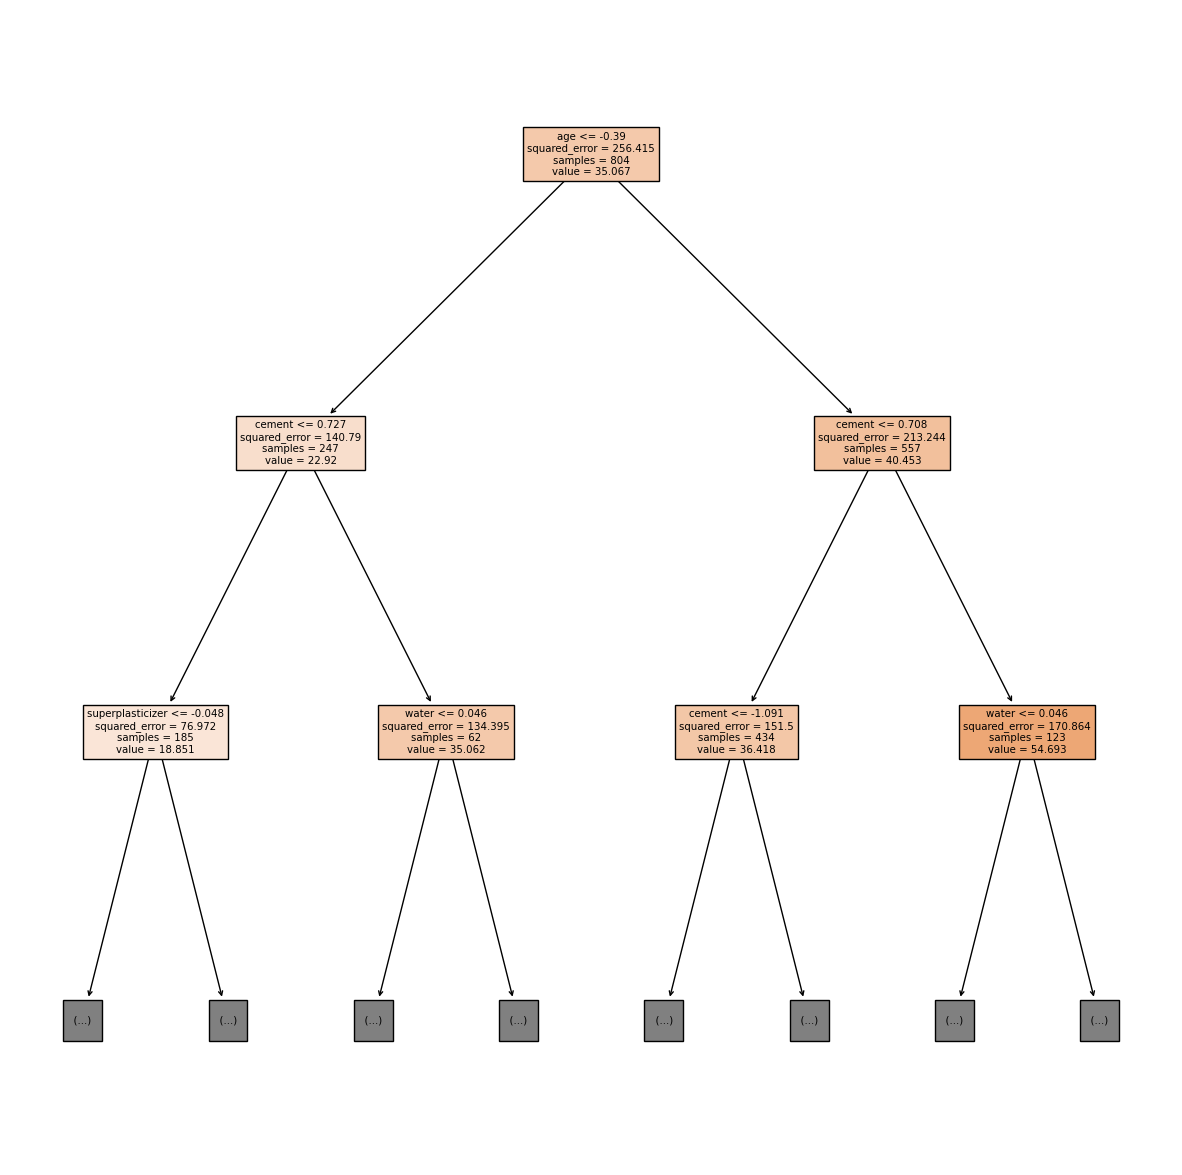

In [84]:
plt.figure(figsize=(15,15))
plot_tree(best_dtr,max_depth = 2, feature_names=xtrain.columns, filled = True)
plt.show()

### Step 8 - Predict out of sample data

In [85]:
xnew = pd.read_csv("cement_sample.csv")
xnew

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,700,100,0,200,2,1100,550,95
1,300,70,20,100,0,1000,600,120


In [86]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [87]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,4.040265,0.324593,-0.865375,0.840401,-0.681633,1.620086,-2.773188,0.771444
1,0.204892,-0.023726,-0.553732,-3.848114,-1.019640,0.330447,-2.150527,1.163890


In [88]:
preds = best_dtr.predict(xnew_pre)
preds

array([52.23333333, 53.08666667])

In [89]:
xnew["strength_pred"] = preds

In [90]:
xnew

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength_pred
0,700,100,0,200,2,1100,550,95,52.233333
1,300,70,20,100,0,1000,600,120,53.086667


In [91]:
xnew.to_csv("results.csv",index = False)